In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
data_dir = Path("data")

In [4]:
store_sales = pd.read_csv(
    data_dir / "train.csv",
    dtype={
        "store_nbr": "category",
        "family": "category",
        "sales": "float32",
        "onpromotion": "uint32",
    },
    index_col="date",
    parse_dates=["date"]
)

In [5]:
store_sales.drop("id", axis=1, inplace=True)

In [6]:
store_sales.head()

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0
2013-01-01,1,BABY CARE,0.0,0
2013-01-01,1,BEAUTY,0.0,0
2013-01-01,1,BEVERAGES,0.0,0
2013-01-01,1,BOOKS,0.0,0


In [7]:
store_sales["store_nbr"].values

['1', '1', '1', '1', '1', ..., '9', '9', '9', '9', '9']
Length: 3000888
Categories (54, object): ['1', '10', '11', '12', ..., '6', '7', '8', '9']

In [8]:
store_sales = store_sales.to_period("D")

In [9]:
store_sales = store_sales.set_index(["store_nbr", "family"], append=True)

In [10]:
store_sales.head()

sales  onpromotion
date       store_nbr family                        
2013-01-01 1         AUTOMOTIVE    0.0            0
                     BABY CARE     0.0            0
                     BEAUTY        0.0            0
                     BEVERAGES     0.0            0
                     BOOKS         0.0            0

In [11]:
avg_sales = store_sales.groupby("date").sum()[["sales"]]

In [12]:
avg_sales.head()

,sales
date,
2013-01-01,2511.618896
2013-01-02,496092.406250
2013-01-03,361461.218750
2013-01-04,354459.687500
2013-01-05,477350.125000


In [13]:
import numpy as np

In [14]:
avg_sales["time"] = np.arange(len(avg_sales.index))  # No NaN values!

In [15]:
avg_sales.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1684 entries, 2013-01-01 to 2017-08-15
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   1684 non-null   float32
 1   time    1684 non-null   int32  
dtypes: float32(1), int32(1)
memory usage: 90.9 KB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Time plot of average sales')

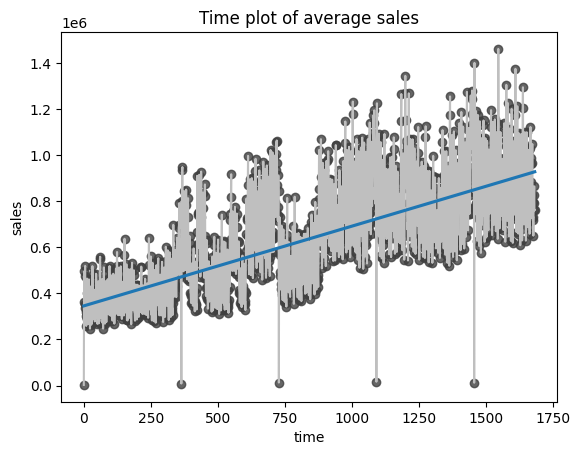

In [17]:
fig, ax = plt.subplots()

ax.plot("time", "sales", data=avg_sales, color="0.75")
ax = sns.regplot(x="time", y="sales", data=avg_sales, ci=None, scatter_kws=dict(color="0.25"))
# ax.set_aspect("equal")
ax.set_title("Time plot of average sales")

In [18]:
avg_sales["lag"] =  avg_sales["sales"].shift(1)  # Lag by 1 day

In [19]:
avg_sales.dropna(inplace=True)

In [20]:
avg_sales.head()

,sales,time,lag
date,,,
2013-01-02,496092.40625,1,2511.618896
2013-01-03,361461.21875,2,496092.406250
2013-01-04,354459.68750,3,361461.218750
2013-01-05,477350.12500,4,354459.687500
2013-01-06,519695.40625,5,477350.125000


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X = avg_sales[["lag"]]
y = avg_sales["sales"]

In [23]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [24]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [25]:
lag_model = (model.coef_, model.intercept_)

Text(0.5, 1.0, 'Lag plot of sales')

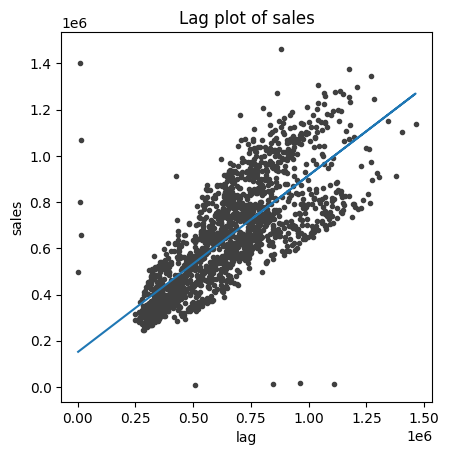

In [26]:
fig, ax = plt.subplots()

ax.plot(X["lag"], y, ".", color="0.25")
ax.plot(X["lag"], y_pred)
ax.set_aspect("equal")
ax.set_ylabel("sales")
ax.set_xlabel("lag")
ax.set_title("Lag plot of sales")

In [27]:
avg_sales

,sales,time,lag
date,,,
2013-01-02,496092.40625,1,2511.618896
2013-01-03,361461.21875,2,496092.406250
2013-01-04,354459.68750,3,361461.218750
2013-01-05,477350.12500,4,354459.687500
2013-01-06,519695.40625,5,477350.125000
...,...,...,...
2017-08-11,826373.75000,1679,651386.937500
2017-08-12,792630.56250,1680,826373.750000
2017-08-13,865639.68750,1681,792630.562500


In [28]:
X = avg_sales[["time", "lag"]]
y = avg_sales["sales"]

In [29]:
model = LinearRegression()

In [30]:
model.fit(X, y)

LinearRegression()

In [31]:
y_pred = pd.Series(model.predict(X), index=X.index)

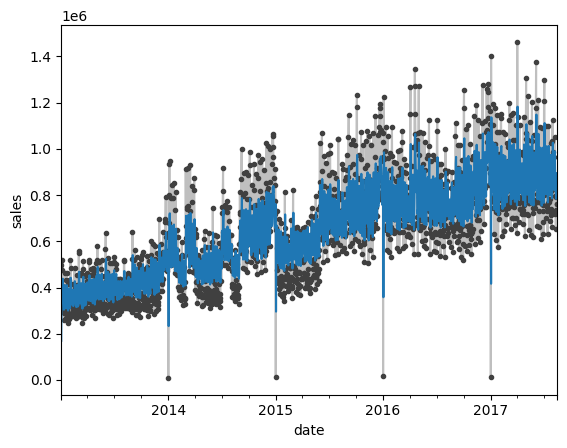

In [32]:
fig, ax = plt.subplots()

ax = y.plot(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)
ax.set_ylabel("sales")
ax = y_pred.plot()